In [1]:
import pandas as pd
from pandas import DataFrame,Series

In [42]:
file = '../data/train.csv'

In [43]:
dframe = pd.read_csv(file)

In [44]:
dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
dframe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
# Who were the passengers
# Deck versus class
# Where were they from?

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

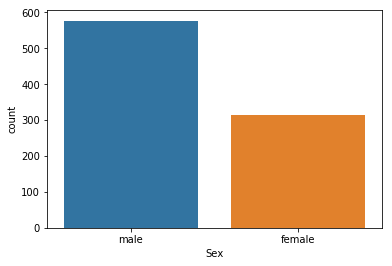

In [21]:
sns.countplot('Sex',data=dframe)

In [22]:
url = 'https://seaborn.pydata.org/generated/seaborn.catplot.html'

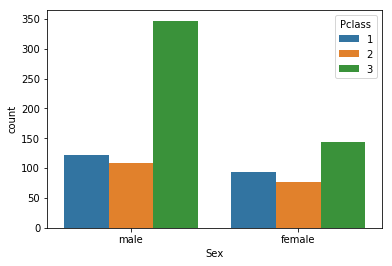

In [23]:
sns.countplot('Sex',data=dframe,hue='Pclass')

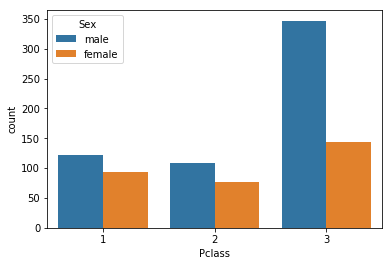

In [24]:
sns.countplot('Pclass',data=dframe,hue='Sex')

In [29]:
def male_female_child(passenger):
    age,sex = passenger
    if age<16:
        return 'child'
    else:
        return sex

In [30]:
dframe['Person'] = dframe[['Age','Sex']].apply(male_female_child,axis=1)

In [31]:
dframe.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


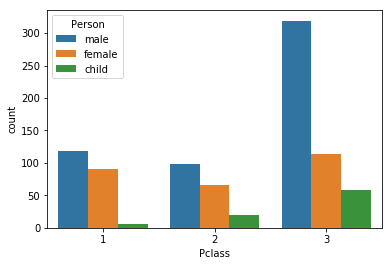

In [32]:
sns.countplot('Pclass',data=dframe,hue='Person')

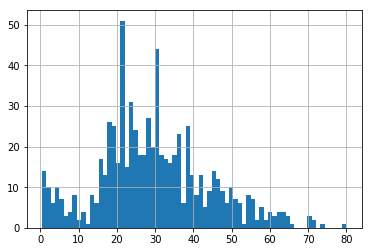

In [33]:
dframe['Age'].hist(bins=70)

In [34]:
dframe['Age'].mean()

29.69911764705882

In [36]:
dframe['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

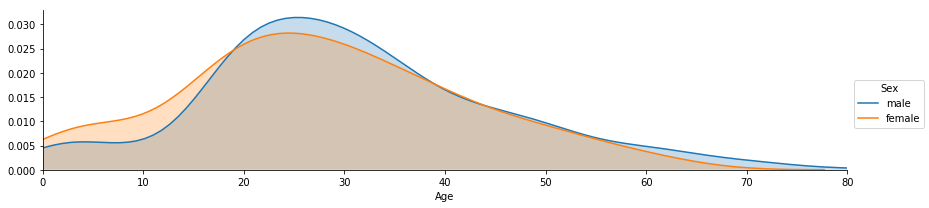

In [37]:
fig = sns.FacetGrid(dframe,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = dframe['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()


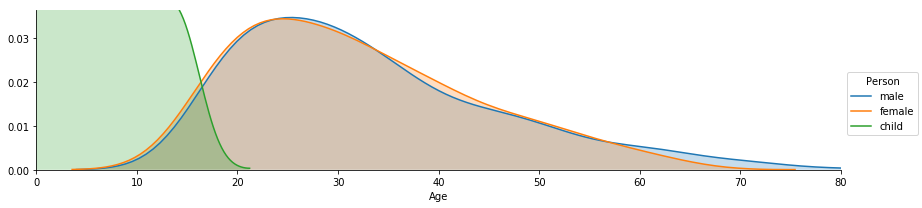

In [38]:
fig = sns.FacetGrid(dframe,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = dframe['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

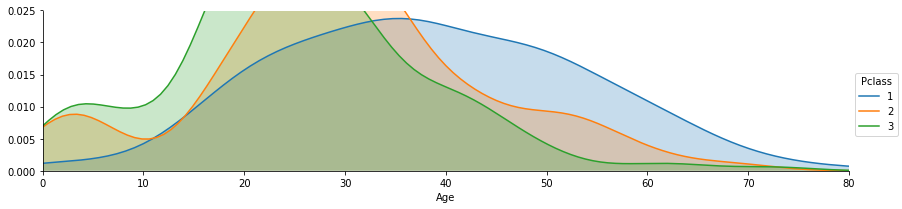

In [39]:
fig = sns.FacetGrid(dframe,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = dframe['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [45]:
# drop null values

deck = dframe['Cabin'].dropna()

In [46]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

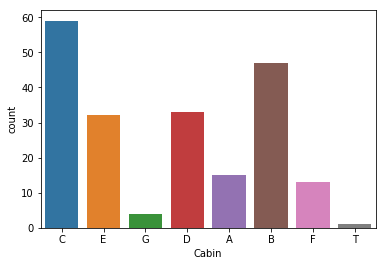

In [51]:
levels = []
for level in deck:
    levels.append(level[0])

cabin = DataFrame(levels)
cabin.columns = ['Cabin']

sns.countplot('Cabin',data = cabin)

In [53]:
cabin = cabin[cabin.Cabin != 'T']

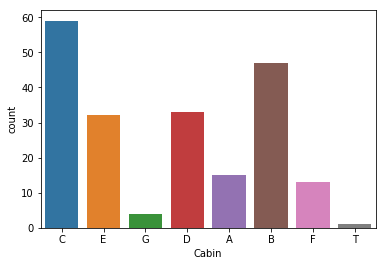

In [54]:
levels = []
for level in deck:
    levels.append(level[0])

cabin = DataFrame(levels)
cabin.columns = ['Cabin']

sns.countplot('Cabin',data = cabin)

In [55]:
dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


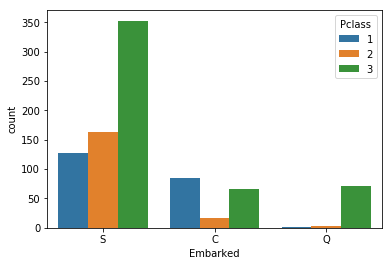

In [61]:
sns.countplot('Embarked',data=dframe,hue='Pclass')